<a href="https://colab.research.google.com/github/yoshithadivi/ChatBot-/blob/main/detection_of_emotions_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/misbah4064/facial_expressions.git

Cloning into 'facial_expressions'...
remote: Enumerating objects: 14243, done.
remote: Total 14243 (delta 0), reused 0 (delta 0), pack-reused 14243
Receiving objects: 100% (14243/14243), 240.06 MiB | 24.83 MiB/s, done.
Resolving deltas: 100% (232/232), done.
Updating files: 100% (14004/14004), done.


Creating directories


In [3]:

%cd facial_expressions/
%mkdir -p data_set/{anger,sad,happy,neutral,sad,surprise}

/content/facial_expressions


extracting images with expressions

In [5]:
import cv2
with open('anger.txt','r') as f:
  img = [line.strip() for line in f]
for image in img:
  loadedImage = cv2.imread("images/"+image)
  cv2.imwrite("data_set/anger/"+image, loadedImage)
print("done")

done writing


In [6]:
import cv2
with open('happy.txt','r') as f:
  img = [line.strip() for line in f]
for image in img:
  loadedImage = cv2.imread("images/"+image)
  cv2.imwrite("data_set/happy/"+image, loadedImage)
print("done")

done


In [7]:
import cv2
with open('sad.txt','r') as f:
  img = [line.strip() for line in f]
for image in img:
  loadedImage = cv2.imread("images/"+image)
  cv2.imwrite("data_set/sad/"+image, loadedImage)
print("done")

done


In [8]:
import cv2
with open('surprise.txt','r') as f:
  img = [line.strip() for line in f]
for image in img:
  loadedImage = cv2.imread("images/"+image)
  cv2.imwrite("data_set/surprise/"+image, loadedImage)
print("done")

done


In [9]:
import cv2
with open('neutral.txt','r') as f:
  img = [line.strip() for line in f]
for image in img:
  loadedImage = cv2.imread("images/"+image)
  cv2.imwrite("data_set/neutral/"+image, loadedImage)
print("done")

done


In [21]:
%mkdir dataset

mkdir: cannot create directory ‘dataset’: File exists


step1: creating datset of faces

In [23]:
import cv2
with open('anger.txt', 'r') as f:
  images = [line.strip() for line in f]
face_detector = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

#for each person, enter one numeric face id
face_id = input('\n enter user id end press <return> ==> ')

count = 0
for image in images:
  img= cv2.imread("data_set/anger/"+image)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  faces = face_detector.detectMultiScale(gray, 1.3,5)

  for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y), (x+w,y+h), (255,0,0),2)
    count +=1
    cv2.imwrite("dataset/user." + str(face_id)+ '.' + str(count) + ".jpg", gray[y:y+h, x:x+w])
print(" done creating face data")



 enter user id end press <return> ==> 0
 done creating face data


In [28]:
import cv2
with open('happy.txt', 'r') as f:
  images = [line.strip() for line in f]
face_detector = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

#for each person, enter one numeric face id
face_id = input('\n enter user id end press <return> ==> ')

count = 0
for image in images:
  img= cv2.imread("data_set/happy/"+image)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  faces = face_detector.detectMultiScale(gray, 1.3,5)

  for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y), (x+w,y+h), (255,0,0),2)
    count +=1
    cv2.imwrite("dataset/user." + str(face_id)+ '.' + str(count) + ".jpg", gray[y:y+h, x:x+w])
print(" done creating face data")



 enter user id end press <return> ==> 1
 done creating face data


In [29]:
import cv2
with open('sad.txt', 'r') as f:
  images = [line.strip() for line in f]
face_detector = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

#for each person, enter one numeric face id
face_id = input('\n enter user id end press <return> ==> ')

count = 0
for image in images:
  img= cv2.imread("data_set/sad/"+image)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  faces = face_detector.detectMultiScale(gray, 1.3,5)

  for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y), (x+w,y+h), (255,0,0),2)
    count +=1
    cv2.imwrite("dataset/user." + str(face_id)+ '.' + str(count) + ".jpg", gray[y:y+h, x:x+w])
print(" done creating face data")



 enter user id end press <return> ==> 3
 done creating face data


In [14]:
%mkdir trainer

mkdir: cannot create directory ‘trainer’: File exists


step2: training images

In [30]:
import cv2
import numpy as np
from PIL import Image
import os

#path for face image database
path = 'dataset'

recognizer = cv2.face.LBPHFaceRecognizer_create()
detctor = cv2.CascadeClassifier("haarcascade_frontalface_default.xml");

#function ton get the images and labeled data
def getimagesandlabels(path):
  imagePaths = [os.path.join(path,f) for f in os.listdir(path)]
  faceSamples=[]
  ids=[]

  for imagePath in imagePaths:
    PIL_img = Image.open(imagePath).convert('L') #convert it to grayscale
    img_numpy = np.array(PIL_img,'uint8')

    id = int(os.path.split(imagePath)[-1].split(".")[1])
    faces = detctor.detectMultiScale(img_numpy)

    for (x,y,w,h) in faces:
      faceSamples.append(img_numpy[y:y+h, x:x+w])
      ids.append(id)
  return faceSamples,ids
print("\n[INFO] Training faces...")
faces,ids = getimagesandlabels(path)
recognizer.train(faces, np.array(ids))

#save the model into trainer/trainer.yml
recognizer.write('trainer/trainer.yml')

#print the num of faces trained and end program
print("\n [INFO]{0} faces trained. exiting program".format(len(np.unique(ids))))




[INFO] Training faces...

 [INFO]3 faces trained. exiting program


step3: recognition

In [33]:
import cv2
import numpy as np
import os
recognizer = cv2.face.LBPHFaceRecognizer_create()
recognizer.read('trainer/trainer.yml')
cascadePath = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cascadePath);

font = cv2.FONT_HERSHEY_SIMPLEX
#initiate id counter
id = 0
#names related to ids
names = ['Anger', 'Happy', 'sad' ,'None', 'None', 'None', 'None']

#intitialize and start realtime video capture
cam = cv2.VideoCapture(0)
cam.set(3, 640) #set video width
cam.set(4, 480) #set video height

#define min window size to be recognized as a face
minW = 0.1*cam.get(3)
minH = 0.1*cam.get(4)

#ret, img=cam.read()
img= cv2.imread("dwayne.jpg")

#img = cv2.flip(img, -1) #flip vertically
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

faces = faceCascade.detectMultiScale(
    gray,
    scaleFactor=1.2,
    minNeighbors=5,
    minSize=(int(minW), int(minH)),
)

for(x,y,w,h) in faces:
  cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0),2)

  id, confidence = recognizer.predict(gray[y:y+h, x:x+w])

  #check if confidence is less than 100 ==> "0" is perfect match
  if (confidence < 100):
    id = names[id]
    confidence= "{0}%".format(round(100 - confidence))
  else:
    id = "unknown"
    confidence= "{0}%".format(round(100 - confidence))

  cv2.putText(img, str(id), (x+5, y-5), font, 1, (255,255,255),2)
  cv2.putText(img, str(confidence), (x+5, y+h-5), font, 1, (255,255,0),1)
cv2.imwrite("dwayne_johnson.jpg", img)

#cleanup
print("\n [INFO] done detecting and image is saved")
cam.release()
cv2.destroyAllWindows()







 [INFO] done detecting and image is saved


In [42]:
import cv2
import numpy as np
import os
recognizer = cv2.face.LBPHFaceRecognizer_create()
recognizer.read('trainer/trainer.yml')
cascadePath = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cascadePath);

font = cv2.FONT_HERSHEY_SIMPLEX
#initiate id counter
id = 0
#names related to ids
names = ['Anger', 'Happy', 'sad' ,'None', 'None', 'None', 'None']

#intitialize and start realtime video capture
cam = cv2.VideoCapture(0)
cam.set(3, 640) #set video width
cam.set(4, 480) #set video height

#define min window size to be recognized as a face
minW = 0.1*cam.get(3)
minH = 0.1*cam.get(4)

#ret, img=cam.read()
img= cv2.imread("sad.jpg")

#img = cv2.flip(img, -1) #flip vertically
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = faceCascade.detectMultiScale(
    gray,
    scaleFactor=1.2,
    minNeighbors=5,
    minSize=(int(minW), int(minH)),
)

for(x,y,w,h) in faces:
  cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0),2)

  id, confidence = recognizer.predict(gray[y:y+h, x:x+w])

  #check if confidence is less than 100 ==> "0" is perfect match
  if (confidence < 100):
    id = names[id]
    confidence= "{0}%".format(round(100 - confidence))
  else:
    id = "unknown"
    confidence= "{0}%".format(round(100 - confidence))

  cv2.putText(img, str(id), (x+5, y-5), font, 1, (255,255,255),2)
  cv2.putText(img, str(confidence), (x+5, y+h-5), font, 1, (255,255,0),1)
cv2.imwrite("sad_boy.jpg", img)

#cleanup
print("\n [INFO] done detecting and image is saved")
cam.release()
cv2.destroyAllWindows()

error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


display detected img

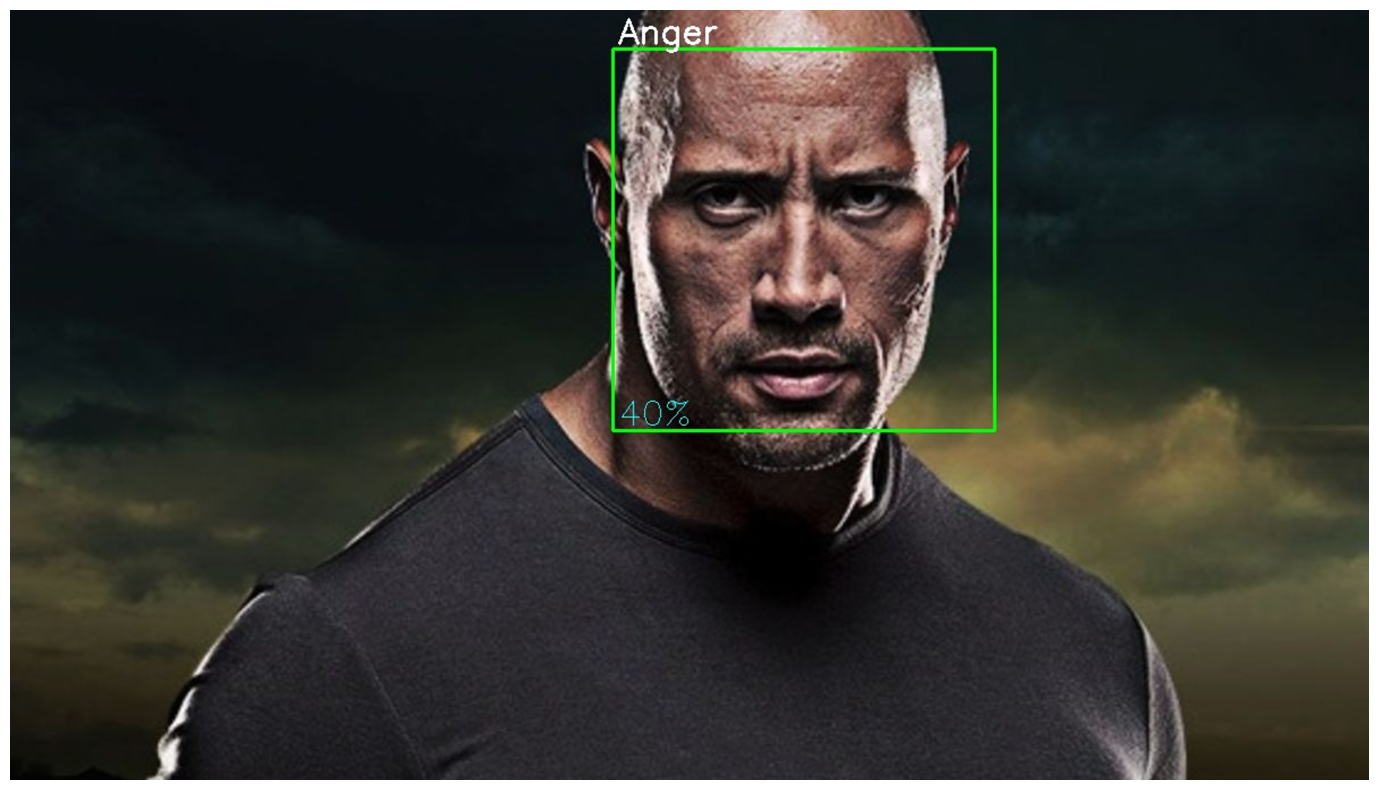

In [37]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
image = cv2.imread("dwayne_johnson.jpg")
height, width = image.shape[:2]
resized_image = cv2.resize(image, (3*width, 3*height), interpolation = cv2.INTER_CUBIC)

fig = plt.gcf()

fig.set_size_inches (18, 10)

plt.axis("off")
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.show()

In [39]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
image = cv2.imread("sad.jpg")
height, width = image.shape[:2]
resized_image = cv2.resize(image, (3*width, 3*height), interpolation = cv2.INTER_CUBIC)

fig = plt.gcf()

fig.set_size_inches (18, 10)

plt.axis("off")
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.show()

AttributeError: 'NoneType' object has no attribute 'shape'